# Project Final Submission Template

### Step 1a: Planning 
#### Identify the information in the file your program will read

Double click this cell to edit.

Describe (all) the information that is available. Be sure to note any surprising or unusual features. (For example, some information sources have missing data, which may be blank or flagged using values like -99, NaN, or something else.)

**This csv file contains the world happiness ranking of countries in relation with their happiness score, GDP per Capital, family, health life expectancy, freedom, generosity, trust government corruption, and dystopia residual. These values are all float numbers varying in range [0, ...).**

### Step 1b: Planning 
#### Brainstorm ideas for what your program will produce
#### Select the idea you will build on for subsequent steps

Double click this cell to edit.

You must brainstorm at least three ideas for graphs or charts that your program could produce and choose the one that you'd like to work on. You can choose between a line chart, histogram, bar chart, scatterplot, or pie chart.

**-Visualization of the relationship between the ratio of happiness score and GDP per Capital AND the ranking of countries. This will be represented by bar chart.**

**(I choose this as my project topic)**

-Scatterplot of happiness score vs GDP per Capital in different continents. This reveals the relation between these two factors in different continents. 

-Bar chart of the relationship between the Freedom and Trust Government Corruption. Similar with the first option, this illustrates the relationship between these two factors. 

### Step 1c: Planning 
#### Write or draw examples of what your program will produce

Double click this cell to edit. 

You must include an image that shows what your chart or plot will look like. You can insert an image using the Insert Image command near the bottom of the Edit menu.

**Since the pyplot function always returns None, the outcome will definitely be None.**

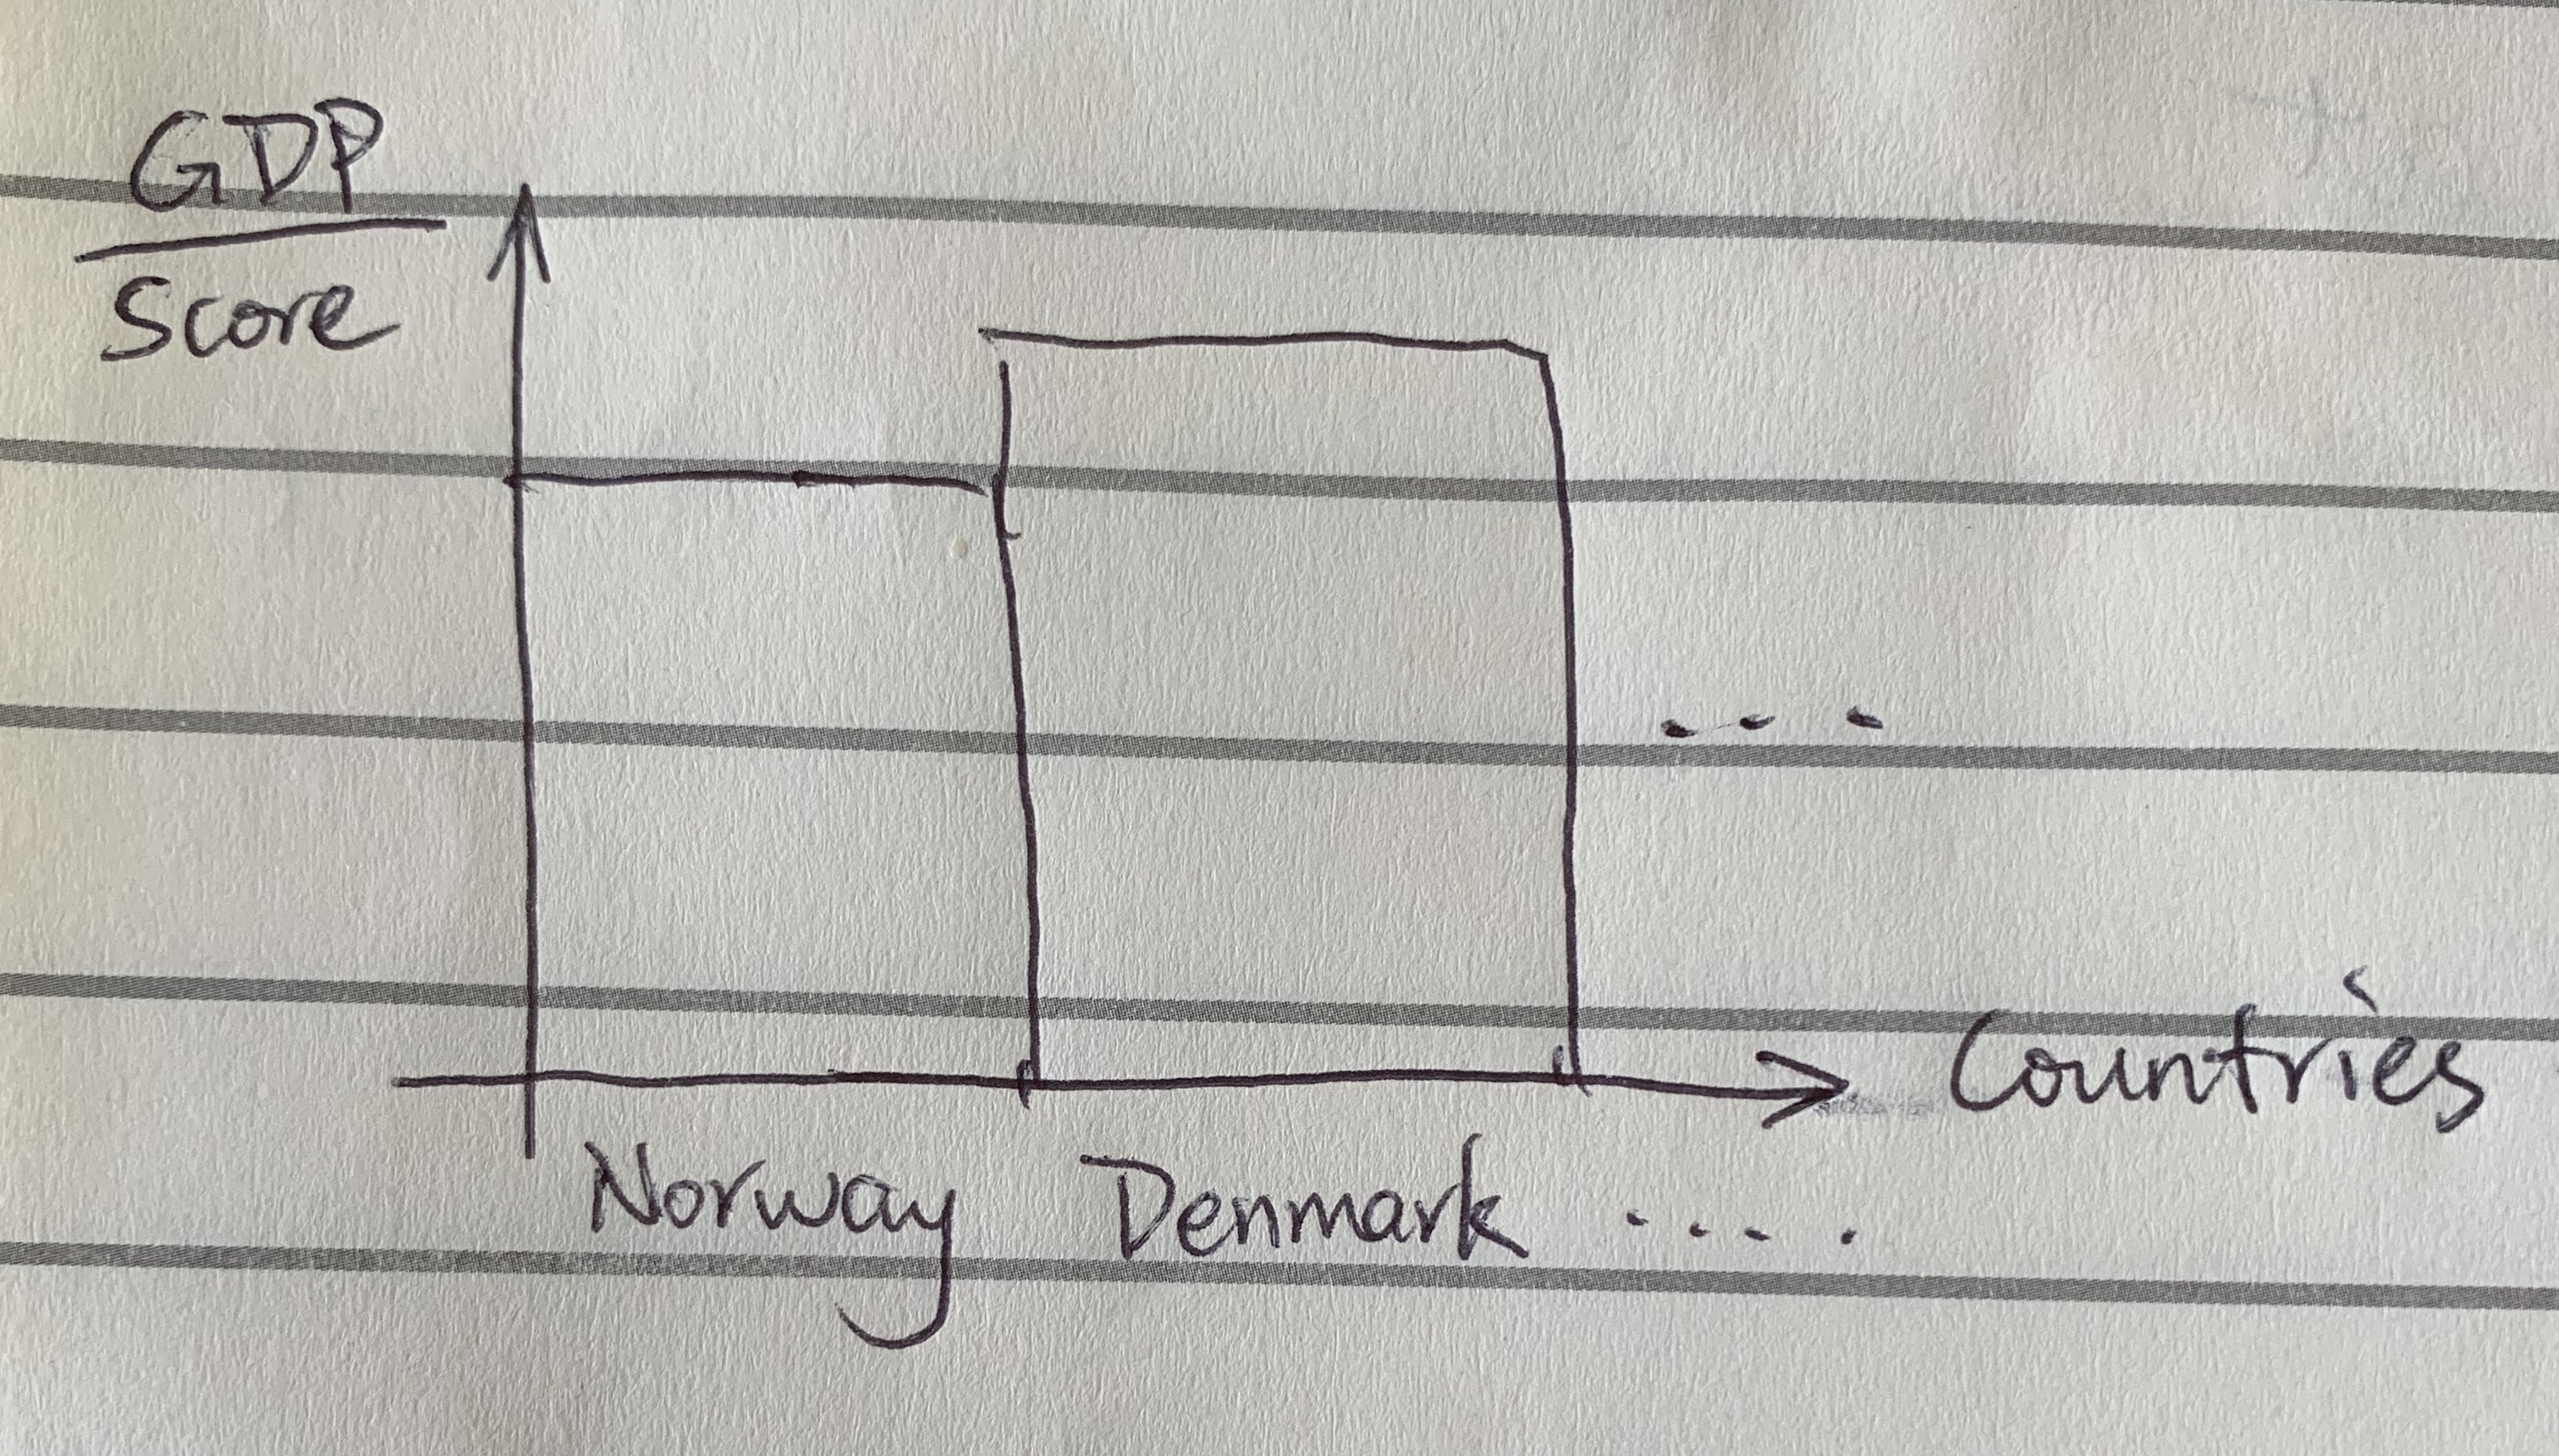

### Step 2a: Building
#### Document which information you will represent in your data definitions
#### Design data definitions

Double click this cell to edit.

Before you design data definitions in the code cell below, you must explicitly document here which information in the file you chose to represent and why that information is crucial to the chart or graph that you'll produce when you complete step 2c.

**The file of world happiness ranking contains a whole bunch of data that is either directly or indirectly linked to the happniess of the citizen of a specific country. For my project, I would like to investigate the relationship of explicitly with GDP per Capital.  Then I will present the data by x-axis (ranking of the countries) and y-axis (the ratio). The relationship of ranking and GDP would be illustrated by doing such a bar graph.**

In [1]:
from cs103 import *
from typing import NamedTuple, List
import csv
import matplotlib.pyplot as plt

Country = NamedTuple('Country', [('country', str),        # the country's name
                                 ('happy_score', float),   # in range (2, 8)
                                 ('gdp', float)])     # in range [0, 2)
# interp. a country with its name (country), happiness score (happy_score),
# and GDP per Capital (gdp)

NORWAY = Country('Norway', 7.537000179, 1.616463184)
DENMARK = Country('Denmark', 7.521999836, 1.482383013)
ICELAND = Country('Iceland', 7.504000187, 1.48063302)
SWITZERLAND = Country('Switzerland', 7.493999958, 1.564979553)
FINLAND = Country('Finland', 7.468999863, 1.443571925)

# template based on Compound (3 fields)
@typecheck
def fn_for_country(c: Country) -> ...:
    return ...(c.country,        # str representing the country
               c.happy_score,    # float in range (2, 8)
               c.gdp)            # float in range [0, 2)


# List[Country]
# interp. a list of Country

L_None = []
L1 = [NORWAY, DENMARK, ICELAND, SWITZERLAND, FINLAND]
L2 = [Country('A', 6.789, 1.900),
      Country('B', 4.890, 0.900)]

@typecheck
# template based on arbitrary-sized and the reference rule
def fn_for_loc(loc: List[Country]) -> ...:
    # description of the acc
    acc = ...       # type: ...
    for c in loc:
        ...(fn_for_country(c), acc)

    return acc

### Step 2b and 2c: Building
#### Design a function to read the information and store it as data in your program
#### Design functions to analyze the data


Complete these steps in the code cell below. You will likely want to rename the analyze function so that the function name describes what your analysis function does.

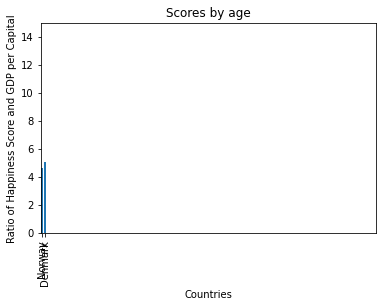

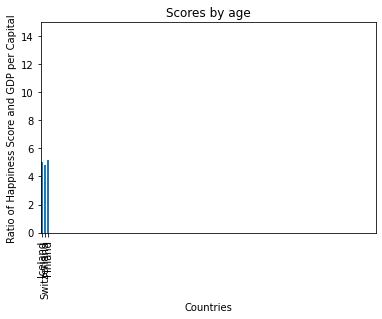

2 of 2 tests passed
2 of 2 tests passed


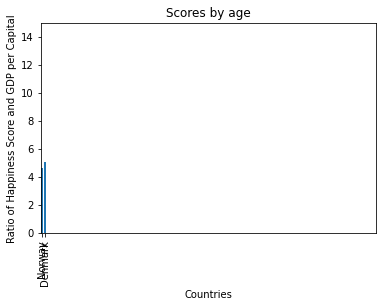

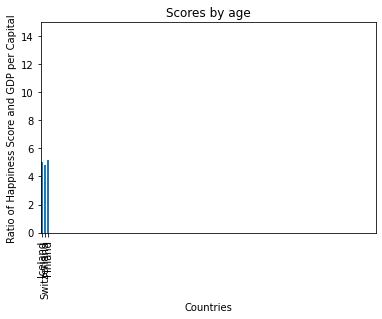

2 of 2 tests passed
3 of 3 tests passed
2 of 2 tests passed
3 of 3 tests passed
3 of 3 tests passed


In [8]:
@typecheck
def main(filename: str) -> None:
    """
    Reads the file from given filename, calculate the ratio of 
    happiness score (happy_score) and GDP per Capital (gdp), 
    and plot a graph of the ratio with its corresponding country
    """
    # Template from HtDAP, based on function composition 
    return analyze(read(filename)) 
    

@typecheck
def read(filename: str) -> List[Country]:
    """    
    reads information from happiness ranking files and return a list of valid Country data
    The countries with gdp 0 would not be take into consideration.
    """
    # return []  #stub
    # Template from HtDAP
    # loc contains the result so far
    loc = [] # type: List[Country]

    with open(filename) as csvfile:
        
        reader = csv.reader(csvfile)
        next(reader) # skip header line
            
        for row in reader:
            gdp = parse_float(row[5])
            if gdp > 0:
                c = Country(row[0],                # just a str
                            parse_float(row[2]),   # represents a float (2, 8)
                            parse_float(row[5]))   # represents a float [0, 2)
                loc.append(c)
    
    return loc


@typecheck
def analyze(loc: List[Country]) -> None:
    """
    display a bar chart showing the ratio of happiness score (happy_score) 
    and GDP per Capital (gdp), with respect to the individual countries
    """
    # Template based on visualization
    
    bar_width = 8
    opacity = 0.8
    ratio = calculate_list(loc)
    
    
    middle_of_bars = produce_num_sequence(ratio, 5, bar_width + 2)
    
    ratio = calculate_list(loc)
    bar = plt.bar(middle_of_bars, ratio, bar_width)  
    
    plt.xlabel('Countries')
    plt.ylabel('Ratio of Happiness Score and GDP per Capital')
    plt.title('Scores by age')
    
    plt.axis([0,1200,0,15])
    
    labels = get_name_list(loc)
    plt.xticks(middle_of_bars, labels, rotation='vertical')
    plt.margins(0.2)
    plt.subplots_adjust(bottom=0.15)
    
    plt.show()
    
    return None


@typecheck
def calculate_list(loc: List[Country]) -> List[float]: 
    """ 
    return a list of ratio of happiness score (happy_score) and GDP per Capital (gdp)
    """ 
    # Template from List [Country]
    # acc contains the result so far
    acc = [] # type: List[float]
    for c in loc:
        acc.append(calculate(c))
    return acc


@typecheck
def calculate(c: Country) -> float:
    """
    return the ratio of happiness score (happy_score) and GDP per Capital (gdp)
    """
    # Template from Country
    return (c.happy_score/c.gdp)


@typecheck
def get_name_list(loc: List[Country]) -> List[str]:
    """
    return a list containing all the names of countries
    """
    # Template from List [Country]
    # acc contains the result so far
    acc = [] # type: List[str]
    for c in loc:
        acc.append(c.country)
    return acc


@typecheck
def produce_num_sequence(values: List[float], initial: float, gap: float) -> List[float]:
    """
    Produce a list of numbers like [initial, initial + gap, initial + 2*gap, ...] of the same
    length as values, e.g., to give alignment coordinates for a plot. The number
    of numbers in the list is equal to len(values). The first value is initial. The gap between values
    is gap.
    """
    #return []  #stub
    # Template from List[float] with two additional parameters
    # nums is the numbers for the values seen so far
    nums = []  # type: List[float]
    
    next_num = initial
    
    for val in values:
        nums.append(next_num)
        next_num = next_num + gap
    
    return nums


start_testing()
# Examples and tests for main
expect(main('happiness_ranking_test1.csv'), None)
#
#     |
#  10 |
#     |
#     |
#     |
#     |          *
#   5 |  *       *
#     |  *       *
#     |  *       *
#     |  *       *
#     |  *       *
#     +--------------------------------------------
#
#     Norway   Denmark
expect(main('happiness_ranking_test2.csv'), None)
#
#     |
#  10 |
#     |
#     |
#     | 
#     |  *                     *
#   5 |  *         *           *
#     |  *         *           *
#     |  *         *           *
#     |  *         *           *
#     |  *         *           *
#     +--------------------------------------------
#
#     Iceland  Switzerland  Finland
summary()

start_testing()
# Examples and tests for read
expect(read('happiness_ranking_test1.csv'), [NORWAY, DENMARK])
expect(read('happiness_ranking_test2.csv'), [ICELAND, SWITZERLAND, FINLAND])
summary()

start_testing()
# Examples and tests for analyze
expect(analyze([NORWAY, DENMARK]), None)
#
#     |
#  10 |
#     |
#     |
#     |
#     |          *
#   5 |  *       *
#     |  *       *
#     |  *       *
#     |  *       *
#     |  *       *
#     +--------------------------------------------
#
#     Norway   Denmark
expect(analyze([ICELAND, SWITZERLAND, FINLAND]), None)
#
#     |
#  10 |
#     |
#     |
#     | 
#     |  *                     *
#   5 |  *         *           *
#     |  *         *           *
#     |  *         *           *
#     |  *         *           *
#     |  *         *           *
#     +--------------------------------------------
#
#     Iceland  Switzerland  Finland
summary()

start_testing()
# Examples and tests for calculate_list
expect(calculate_list(L2), ([(6.789/1.900), (4.890/0.900)]))
expect(calculate_list([NORWAY,DENMARK]), [(7.537000179/1.616463184), (7.521999836/1.482383013)])
expect(calculate_list([]), [])
summary()

start_testing()
# Examples and tests for calculate
expect(calculate(NORWAY), (7.537000179/1.616463184))
expect(calculate(DENMARK), (7.521999836/1.482383013))
summary()

start_testing()
# Examples and tests for get_name_list
expect(get_name_list(L2), (['A', 'B']))
expect(get_name_list([NORWAY,DENMARK]), ['Norway', 'Denmark'])
expect(get_name_list([]), [])
summary()

start_testing()
# Examples and tests for produce_num_sequence
expect(produce_num_sequence([], 5, 10), [])
expect(produce_num_sequence([1, 10, 3], 5, 10), [5, 15, 25])
expect(produce_num_sequence([1, 10, 3], 0.5, 3.5), [0.5, 4.0, 7.5])
summary()

### Final Graph/Chart

Now that everything is working, you **must** call `main` on the intended information source in order to display the final graph/chart:

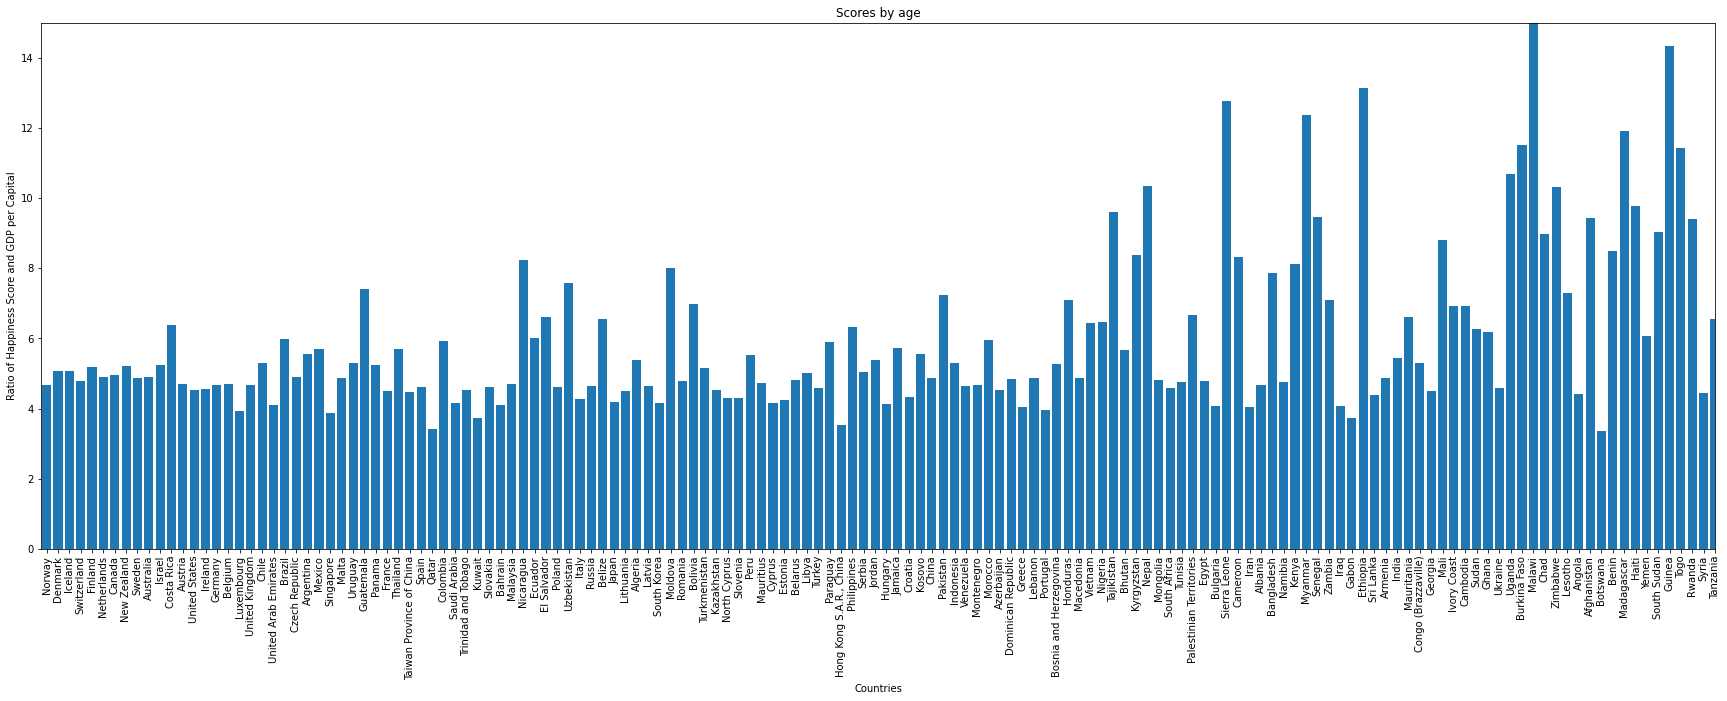

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,10))
main('world_happiness_ranking_2017.csv')

In [11]:
# Remove the # sign from the beginning of the line with your instructor's name. For example, if you are
# in Jessica's class, remove the # from  the line that says INSTRUCTOR_NAME = 'Jessica'. If you are in
# in Meghan's class, remove the # from the line that says INSTRUCTOR_NAME = 'Meghan'.

# RUN THIS CELL (press the "Run" button) AFTER YOU REMOVE THE # SIGN

# INSTRUCTOR_NAME = 'Jessica'
INSTRUCTOR_NAME = 'Meghan'

In [12]:
# Be sure to select ALL THE FILES YOU NEED (including csv's) 
# when you submit. As usual, you cannot edit this cell.
# Instead, run this cell to start the submission process.
from cs103 import submit

COURSE = 0
ASSIGNMENT = 0

if(INSTRUCTOR_NAME == 'Jessica'):
    COURSE = 50466
    ASSIGNMENT = 517964 # Final submission
elif(INSTRUCTOR_NAME == 'Meghan'):
    COURSE = 48359
    ASSIGNMENT = 518017 # Final submission

submit(COURSE, ASSIGNMENT)

# If your submission fails, check to see that you have specified a value for the INSTRUCTOR_NAME variable in the
# cell above AND have run that cell. If you  have done so and your submission is still failing, SUBMIT ANYWAY 
# by downloading your files and uploading them to Canvas. You can learn how on the page 
# "How to submit your Jupyter notebook" on our Canvas site.

Valid(value=True, description='Token')

SelectMultiple(description='Files', index=(0,), layout=Layout(height='100%', width='50%'), options=('project_m…

Button(description='submit', icon='check', style=ButtonStyle(), tooltip='submit')

We are about to submit the files:
project_final_submission_template.ipynb, happiness_ranking_test1.csv, world_happiness_ranking_2017.csv, happiness_ranking_test2.csv

- We do this by moving only the files you selected to their own space, restarting a kernel,
  and running them from top to bottom.
- This ensures that the files you submit are exactly what the course staff needs to recreate your output.
- We then submit these to Canvas for you and, if successful, give you a link where you can review your submission.
- If there is an error, there will be a VERY LONG error message below.
  Read our suggestions at the bottom and try to ream the error message bottom up.

-----------------------------------------------------------------------------------------------

Your assignment was submitted succesfully!
Please check your submission at this link: https://canvas.ubc.ca/courses/48359/assignments/518017/submissions/262786?preview=1&version=3
It will be easiest to check your submission using 